<a href="https://colab.research.google.com/github/praymesh/CAT-SEG-Test/blob/main/Dataset_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as T
import numpy as np
import os

In [ ]:
#stucture of dataset :
dataset/
coco-stuff/
├── images/
│ ├── train2017/
│ │ ├── 000000000001.jpg
│ │ ├── ...
│ └── val2017/
├── annotations/
│ ├── train2017/
│ │ ├── 000000000001.png ← grayscale mask
│ └── val2017/
├── stuff_classes.txt ← class ID to name (e.g. "0 unlabeled")

In [33]:
!mkdir -p datasets/coco-stuff/images/train2017
!mkdir -p datasets/coco-stuff/images/val2017
!mkdir -p datasets/coco-stuff/annotations/train2017
!mkdir -p datasets/coco-stuff/annotations/val2017

In [34]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://calvin.inf.ed.ac.uk/wp-content/uploads/data/cocostuffdataset/stuffthingmaps_trainval2017.zip
# !wget http://calvin.inf.ed.ac.uk/wp-content/uploads/data/cocostuffdataset/stuff_classes.txt - link doest work|


--2025-06-20 20:51:18--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.16.183, 16.15.184.130, 52.217.130.1, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.16.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G   125MB/s    in 3m 27s  

2025-06-20 20:54:46 (89.0 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2025-06-20 20:54:46--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.1.147, 52.216.8.59, 3.5.27.23, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.1.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  95.4MB/s    

In [35]:
#unzipping the dataset
#coc-stuff/images folder
!unzip -q train2017.zip -d datasets/coco-stuff/images/
!unzip -q val2017.zip -d datasets/coco-stuff/images/

#cocstuff/annotaions/masks
!unzip -q stuffthingmaps_trainval2017.zip -d datasets/coco-stuff/annotations/

#text classes in coco-stuff
#!unzip -q stuff_classes.txt -d datasets/coco-stuff/

For Class Labels

In [ ]:
#dont use this :
!mkdir -p datasets/coco-stuff/
!wget https://github.com/nightrome/cocostuff/blob/master/labels.txt  # this downloads the webpage , ie the html file, code works but webpage gets downloaded as .txt file
!mv labels.txt datasets/coco-stuff/
!ls datasets/coco-stuff

open('datasets/coco-stuff/labels.txt').read() - #

!wget https://github.com/nightrome/cocostuff/blob/master/labels.txt --html webpage , thus downloading manually from same linked webpage :

In [21]:
# prompt: upload file from my pc to location

from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}"')

!mv "{filename}" datasets/coco-stuff/

Saving labels.txt to labels (1).txt
User uploaded file "labels (1).txt"


In [22]:
!rm datasets/coco-stuff/labels.txt

In [38]:
!ls datasets/coco-stuff
!ls datasets/coco-stuff/images
!ls datasets/coco-stuff/annotations/


 annotations   images  'labels (1).txt'
train2017  val2017
train2017  val2017


In [32]:
open("datasets/coco-stuff/labels (1).txt").read().splitlines()

['0: unlabeled',
 '1: person',
 '2: bicycle',
 '3: car',
 '4: motorcycle',
 '5: airplane',
 '6: bus',
 '7: train',
 '8: truck',
 '9: boat',
 '10: traffic light',
 '11: fire hydrant',
 '12: street sign',
 '13: stop sign',
 '14: parking meter',
 '15: bench',
 '16: bird',
 '17: cat',
 '18: dog',
 '19: horse',
 '20: sheep',
 '21: cow',
 '22: elephant',
 '23: bear',
 '24: zebra',
 '25: giraffe',
 '26: hat',
 '27: backpack',
 '28: umbrella',
 '29: shoe',
 '30: eye glasses',
 '31: handbag',
 '32: tie',
 '33: suitcase',
 '34: frisbee',
 '35: skis',
 '36: snowboard',
 '37: sports ball',
 '38: kite',
 '39: baseball bat',
 '40: baseball glove',
 '41: skateboard',
 '42: surfboard',
 '43: tennis racket',
 '44: bottle',
 '45: plate',
 '46: wine glass',
 '47: cup',
 '48: fork',
 '49: knife',
 '50: spoon',
 '51: bowl',
 '52: banana',
 '53: apple',
 '54: sandwich',
 '55: orange',
 '56: broccoli',
 '57: carrot',
 '58: hot dog',
 '59: pizza',
 '60: donut',
 '61: cake',
 '62: chair',
 '63: couch',
 '64: p

In [ ]:
! ls datasets
#checking the stucture

train2017  val2017


In [ ]:
#  checking the size and lenght of dataset
import os
train_images_path = 'datasets/coco-stuff/images/train2017'
val_images_path = 'datasets/coco-stuff/images/val2017'
train_masks_path = 'datasets/coco-stuff/annotations/train2017'
val_masks_path = 'datasets/coco-stuff/annotations/val2017'

train_image_files = os.listdir(train_images_path)
val_image_files = os.listdir(val_images_path)
train_mask_files = os.listdir(train_masks_path)
val_mask_files = os.listdir(val_masks_path)

print(f"Number of training images: {len(train_image_files)}")
print(f"Number of validation images: {len(val_image_files)}")
print(f"Number of training masks: {len(train_mask_files)}")
print(f"Number of validation masks: {len(val_mask_files)}")

# Optionally, you can also check the size of a single image and mask
if len(train_image_files) > 0:
  first_train_image_path = os.path.join(train_images_path, train_image_files[0])
  img = Image.open(first_train_image_path)
  print(f"Size of a training image: {img.size}")

if len(train_mask_files) > 0:
  first_train_mask_path = os.path.join(train_masks_path, train_mask_files[0])
  mask = Image.open(first_train_mask_path)
  print(f"Size of a training mask: {mask.size}")

Number of training images: 118287
Number of validation images: 5000
Number of training masks: 118287
Number of validation masks: 5000
Size of a training image: (640, 480)
Size of a training mask: (640, 348)


In [63]:
# checking Size of dataset directory
!du -h datasets

19G	datasets/coco-stuff/images/train2017
788M	datasets/coco-stuff/images/val2017
19G	datasets/coco-stuff/images
846M	datasets/coco-stuff/annotations/train2017
36M	datasets/coco-stuff/annotations/val2017
881M	datasets/coco-stuff/annotations
20G	datasets/coco-stuff
20G	datasets


In [55]:
# prompt: Excellent! Now that you've successfully set up:
# images (RGB)
# annotations (grayscale PNG masks)
# stuff_classes.txt (label mappings)
# You're ready to start building your CAT-Seg-style model pipeline from scratch.
# Here’s your roadmap from this point forward:
# ✅ Stage 1: Load your data using a custom Dataset
# Use the CocoStuffSiglipDataset class we created earlier:
# from torch.utils.data import DataLoader
# dataset = CocoStuffSiglipDataset(
# image_dir="datasets/coco-stuff/images/train2017",
# mask_dir="datasets/coco-stuff/annotations/train2017",
# class_txt="datasets/coco-stuff/stuff_classes.txt"
# )
# dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
# Test sample
# sample = next(iter(dataloader))
# print(sample['image'].shape) # → [1, 3, 224, 224]
# print(sample['mask'].shape) # → [1, 224, 224]
# 🖼 (Optional) View sample
# from your visualization function:
# show_image_and_mask(sample, dataset.class_names)

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image
import torch
import numpy as np
import os
from torch.utils.data.dataloader import default_collate # Import default_collate

class CocoStuffSiglipDataset(Dataset):
    def __init__(self, image_dir, mask_dir, class_txt, image_size=(224, 224)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_size = image_size
        self.transform = T.Compose([
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Load image and mask filenames, ensuring they match
        image_filenames = {os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith('.jpg')}
        mask_filenames = {os.path.splitext(f)[0] for f in os.listdir(mask_dir) if f.endswith('.png')}

        self.valid_filenames = list(image_filenames.intersection(mask_filenames))

        # Load class names
        with open(class_txt, 'r') as f:
            self.class_names = [line.strip().split()[-1] for line in f.readlines()]

    def __len__(self):
        return len(self.valid_filenames)

    def __getitem__(self, idx):
        filename = self.valid_filenames[idx]

        # Load image
        image_path = os.path.join(self.image_dir, filename + '.jpg')
        image = Image.open(image_path).convert('RGB')
        original_image = image.copy() # Keep a copy of the original image before resizing and transforming
        image = image.resize(self.image_size) # Resize image
        image = self.transform(image)

        # Load mask
        mask_path = os.path.join(self.mask_dir, filename + '.png')
        mask = Image.open(mask_path).convert('L') # Convert to grayscale
        mask = mask.resize(self.image_size, resample=Image.NEAREST) # Resize mask without interpolation
        mask = torch.from_numpy(np.array(mask)).long() # Convert to long tensor

        return {'image': image, 'mask': mask, 'original_image': original_image} # Return original_image

# Custom collate function to handle PIL Images
def custom_collate_fn(batch):
    # Separate original images from the rest of the data
    original_images = [item['original_image'] for item in batch]
    # Remove original_image from the dictionaries before applying default_collate
    batch_without_original_image = [{key: item[key] for key in item if key != 'original_image'} for item in batch]
    # Apply default_collate to the rest of the data
    collated_batch = default_collate(batch_without_original_image)
    # Add original_images back to the collated batch
    collated_batch['original_image'] = original_images
    return collated_batch


# Assume 'datasets/coco-stuff/labels (1).txt' was the manually uploaded file name
dataset = CocoStuffSiglipDataset(
    image_dir="datasets/coco-stuff/images/train2017",
    mask_dir="datasets/coco-stuff/annotations/train2017", # Corrected mask path
    class_txt="datasets/coco-stuff/labels (1).txt" # Using the uploaded file
)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=custom_collate_fn) # Use custom_collate_fn

# Test sample
sample = next(iter(dataloader))
print(sample['image'].shape)
print(sample['mask'].shape)
print(f"Number of original images in sample: {len(sample['original_image'])}")


# Optional: View sample (requires a visualization function)
# Make sure you have a function show_image_and_mask defined
# from your visualization function import show_image_and_mask
# show_image_and_mask(sample, dataset.class_names)

torch.Size([1, 3, 224, 224])
torch.Size([1, 224, 224])
Number of original images in sample: 1


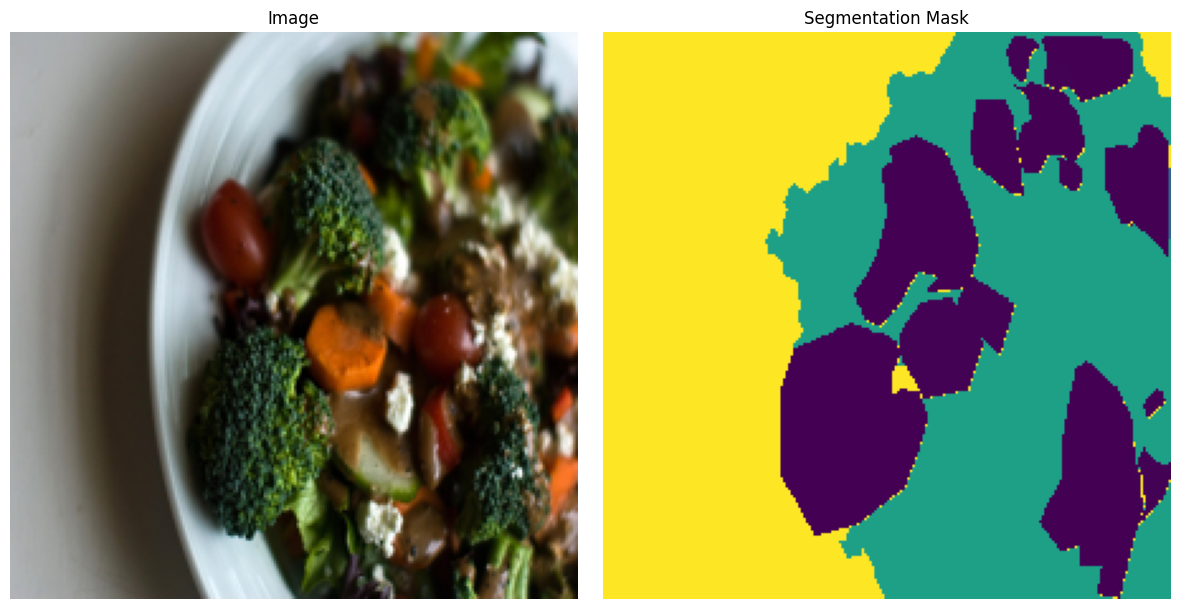

In [46]:
# view sample image,class and annotation

import matplotlib.pyplot as plt

def show_image_and_mask(sample, class_names):
    """
    Displays an image and its corresponding segmentation mask.

    Args:
        sample (dict): A dictionary containing 'image' and 'mask' tensors.
        class_names (list): A list of class names corresponding to mask values.
    """
    image_tensor = sample['image'].squeeze(0) # Remove batch dimension
    mask_tensor = sample['mask'].squeeze(0)   # Remove batch dimension

    # Unnormalize the image for display
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    unnormalized_image = image_tensor * std + mean
    unnormalized_image = torch.clip(unnormalized_image, 0, 1)

    # Convert tensors to numpy arrays for matplotlib
    image_np = unnormalized_image.permute(1, 2, 0).numpy()
    mask_np = mask_tensor.numpy()

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Show image
    axes[0].imshow(image_np)
    axes[0].set_title('Image')
    axes[0].axis('off')

    # Show mask
    # Use a colormap that makes different classes visually distinct
    # We need to handle the case where there are many classes.
    # Let's use a simple mapping or a colormap.
    # For simplicity, we'll just display the mask values.
    im = axes[1].imshow(mask_np, cmap='viridis') # Use a colormap for the mask
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')


    # For a simple visualization, the numerical values in the mask show the class IDs.
    # If you have a class_names list, you could potentially map mask values to names
    # and display them, but this requires more sophisticated visualization.
    # fig.colorbar(im, ax=axes[1])


    plt.tight_layout()
    plt.show()

# Example of how to use the function
# Assume 'dataset' and 'dataloader' are already defined and initialized
# Make sure you have 'dataset' and 'dataloader' defined from previous cells
# from your visualization function import show_image_and_mask # This line is commented out as the function is defined here
sample = next(iter(dataloader))
show_image_and_mask(sample, dataset.class_names)

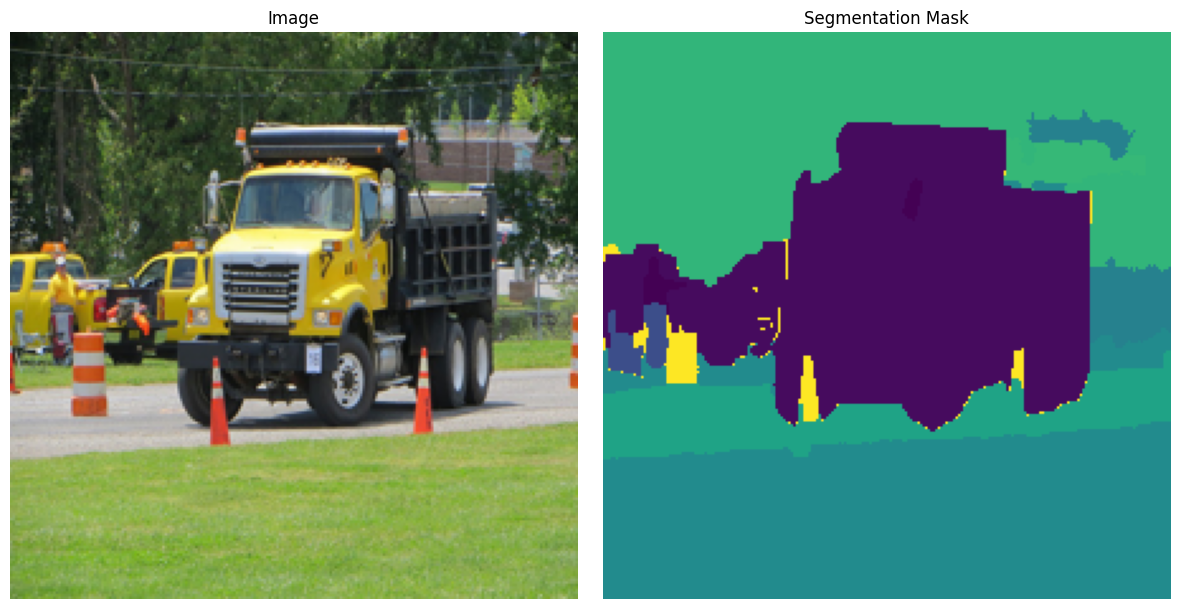

In [57]:

# from your visualization function import show_image_and_mask # This line is commented out as the function is defined here
sample = next(iter(dataloader))
show_image_and_mask(sample, dataset.class_names)

In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [49]:
# !pip install transformers
import transformers
from transformers import  AutoProcessor, AutoModel

I have used the latest SIglip 2 model , instead of original CLIP model

In [50]:
processor = AutoProcessor.from_pretrained("google/siglip2-base-patch16-224")
siglip2 = AutoModel.from_pretrained("google/siglip2-base-patch16-224")
siglip2.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/47.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/253 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

SiglipModel(
  (text_model): SiglipTextTransformer(
    (embeddings): SiglipTextEmbeddings(
      (token_embedding): Embedding(256000, 768)
      (position_embedding): Embedding(64, 768)
    )
    (encoder): SiglipEncoder(
      (layers): ModuleList(
        (0-11): 12 x SiglipEncoderLayer(
          (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attn): SiglipAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): SiglipMLP(
            (activation_fn): PytorchGELUTanh()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_

In [60]:

def get_text_embeddings(class_names):
    prompts = [f"A photo of a {name}" for name in class_names] # Use the list directly
    inputs = processor(text=prompts, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        # Correct model call for Siglip 2
        text_outputs = siglip2.get_text_features(**inputs)
        embeddings = torch.nn.functional.normalize(text_outputs, dim=-1)
    return embeddings

# Assuming dataset is already created and has the attribute class_names
text_embeddings = get_text_embeddings(dataset.class_names) # [num_classes, D],
print(f"Shape of text embeddings: {text_embeddings.shape}")


Shape of text embeddings: torch.Size([183, 768])


In [58]:
#  ✅ Stage 3: Encode an Image using SigLIP


# Use the correct model variable name 'siglip2'
def get_dense_image_features(image_batch):
  """
  image_batch: list of PIL Images
  Returns: L2-normalized dense image features [B, D]
  """
  # Pass the list of PIL Images directly to the processor
  inputs = processor(images=image_batch, return_tensors="pt").to(device)
  with torch.no_grad():
    # Use the correct model variable name 'siglip2'
    outputs = siglip2.get_image_features(**inputs) # [B, D]
  return torch.nn.functional.normalize(outputs, dim=-1)

# Assuming 'sample' is a dictionary with 'original_image' and other keys, and 'dataset' is available
# Call the function with the original image from the sample, in a list as expected by the processor
image_features = get_dense_image_features([sample["original_image"][0]]) # [1, D]

print(f"Shape of image features: {image_features.shape}")

Shape of image features: torch.Size([1, 768])


In [61]:
# prompt: ✅ Stage 4: Compute Cost Volume (cosine sim)
# Compute cost: cosine similarity between image_features and each class embedding
# cost_volume = torch.matmul(image_features, text_embeddings.T) # [1, num_classes]

# Ensure image_features and text_embeddings are on the same device if not already
image_features = image_features.to(device)
text_embeddings = text_embeddings.to(device)

# Compute cosine similarity
# cost_volume will be [1, num_classes]
cost_volume = torch.matmul(image_features, text_embeddings.T)

print(f"Shape of cost volume: {cost_volume.shape}")


Shape of cost volume: torch.Size([1, 183])


In [62]:
# prompt: 🔍 Step 1: Convert to numpy
# cost_volume_np = cost_volume.squeeze().cpu().numpy() # shape: [num_classes]
# 🔍 Step 2: Sort scores and show top classes
# import matplotlib.pyplot as plt
# topk = 10
# topk_ids = cost_volume_np.argsort()[::-1][:topk]
# print("Top classes the image matches:")
# for i in topk_ids:
# score = cost_volume_np[i]
# class_name = dataset.class_names.get(i, "Unknown")
# print(f" {i:3d} → {class_name:20s} | score: {score:.3f}")
# 📊 Step 3: Plot as bar chart
# plt.figure(figsize=(10, 5))
# plt.barh(range(topk), cost_volume_np[topk_ids][::-1])
# plt.yticks(range(topk), [dataset.class_names[i] for i in topk_ids][::-1])
# plt.xlabel("Cosine similarity")
# plt.title("Top class matches (cost volume)")
# plt.tight_layout()
# plt.show()
# 🧠 What You’ll See
# The top 10 class names the image is most similar to
# Their cosine similarity score (between -1 and +1)
# 📌 Interpreting the scores
# A score close to +1 → image strongly matches that class
# 0 → no semantic match
# Negative → likely unrelated

cost_volume_np = cost_volume.squeeze().cpu().numpy() # shape: [num_classes]
# 🔍 Step 2: Sort scores and show top classes
import matplotlib.pyplot as plt
topk = 10
topk_ids = cost_volume_np.argsort()[::-1][:topk]
print("Top classes the image matches:")
for i in topk_ids:
    score = cost_volume_np[i]
    class_name = dataset.class_names.get(i, "Unknown")
    print(f" {i:3d} → {class_name:20s} | score: {score:.3f}")

# 📊 Step 3: Plot as bar chart
plt.figure(figsize=(10, 5))
plt.barh(range(topk), cost_volume_np[topk_ids][::-1])
plt.yticks(range(topk), [dataset.class_names[i] for i in topk_ids][::-1])
plt.xlabel("Cosine similarity")
plt.title("Top class matches (cost volume)")
plt.tight_layout()
plt.show()

Top classes the image matches:


AttributeError: 'list' object has no attribute 'get'